In [82]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
# build vocabulary of characters and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars,1)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
# build the dataset

block_size = 3   #content length: how many chracters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:

    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '---->', itos[ix])

        #crop and append
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [8]:
C = torch.randn((27,2))  #2 dimension embedding

In [9]:
C[5]

tensor([ 1.8084, -0.0062])

In [10]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 1.8084, -0.0062])

In [11]:
C[torch.tensor([5,6,7,7,7])]

tensor([[ 1.8084, -0.0062],
        [ 0.1930, -1.2372],
        [-0.2573,  2.2557],
        [-0.2573,  2.2557],
        [-0.2573,  2.2557]])

In [12]:
C[X].shape

torch.Size([32, 3, 2])

In [13]:
X[13,2]

tensor(1)

In [14]:
C[X][13,2]

tensor([1.5658, 1.3396])

In [15]:
C[1]

tensor([1.5658, 1.3396])

In [16]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [17]:
W1 = torch.randn((6, 100))  #(no.of inputs, neurons)      #no. of i/p-> (batch)*(2d-embd)
b1 = torch.randn(100)

In [18]:
#emb @ w1 + b1   # 32,3,2 @ 6,100   not possible need to concatenate

In [19]:
emb[:, 0, :].shape

torch.Size([32, 2])

In [20]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [21]:
torch.cat(torch.unbind(emb, 1),1 ).shape

torch.Size([32, 6])

In [22]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [23]:
a.shape

torch.Size([18])

In [24]:
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [25]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [26]:
a.storage()

/tmp/ipykernel_3821/214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [27]:
emb.view(32,6).shape

torch.Size([32, 6])

In [28]:
emb.view(32,6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [29]:
emb.view(32,6) @ W1 + b1

tensor([[ 5.8302,  1.4657, -1.8174,  ..., -0.4058,  0.4344,  6.0263],
        [ 5.0481,  1.2255, -0.8598,  ..., -0.4981,  0.3230,  6.2854],
        [ 0.8115, -0.4279,  2.4529,  ..., -0.7378, -0.4997,  6.8553],
        ...,
        [-0.6547, -2.3079, -0.9916,  ..., -1.7016,  1.4890, -1.0578],
        [ 3.3499, -3.4663, -4.7856,  ..., -1.0673, -2.9291,  2.7072],
        [ 3.7255,  1.5643, -0.5640,  ...,  1.7632, -4.5082,  2.5421]])

In [30]:
emb.view(emb.shape[0], 2*block_size) @ W1 + b1

tensor([[ 5.8302,  1.4657, -1.8174,  ..., -0.4058,  0.4344,  6.0263],
        [ 5.0481,  1.2255, -0.8598,  ..., -0.4981,  0.3230,  6.2854],
        [ 0.8115, -0.4279,  2.4529,  ..., -0.7378, -0.4997,  6.8553],
        ...,
        [-0.6547, -2.3079, -0.9916,  ..., -1.7016,  1.4890, -1.0578],
        [ 3.3499, -3.4663, -4.7856,  ..., -1.0673, -2.9291,  2.7072],
        [ 3.7255,  1.5643, -0.5640,  ...,  1.7632, -4.5082,  2.5421]])

In [31]:
emb.view(emb.shape[0], 6) @ W1 + b1

tensor([[ 5.8302,  1.4657, -1.8174,  ..., -0.4058,  0.4344,  6.0263],
        [ 5.0481,  1.2255, -0.8598,  ..., -0.4981,  0.3230,  6.2854],
        [ 0.8115, -0.4279,  2.4529,  ..., -0.7378, -0.4997,  6.8553],
        ...,
        [-0.6547, -2.3079, -0.9916,  ..., -1.7016,  1.4890, -1.0578],
        [ 3.3499, -3.4663, -4.7856,  ..., -1.0673, -2.9291,  2.7072],
        [ 3.7255,  1.5643, -0.5640,  ...,  1.7632, -4.5082,  2.5421]])

In [32]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h

tensor([[ 1.0000,  0.8988, -0.9486,  ..., -0.3849,  0.4090,  1.0000],
        [ 0.9999,  0.8413, -0.6962,  ..., -0.4606,  0.3122,  1.0000],
        [ 0.6704, -0.4036,  0.9853,  ..., -0.6278, -0.4619,  1.0000],
        ...,
        [-0.5749, -0.9804, -0.7581,  ..., -0.9356,  0.9031, -0.7848],
        [ 0.9975, -0.9981, -0.9999,  ..., -0.7884, -0.9943,  0.9911],
        [ 0.9988,  0.9161, -0.5109,  ...,  0.9429, -0.9998,  0.9877]])

In [33]:
h.shape

torch.Size([32, 100])

In [34]:
(emb.view(-1,6) @ W1).shape

torch.Size([32, 100])

In [35]:
b1.shape

torch.Size([100])

In [36]:
# broadcasting
# 32, 100
#  1 , 100

In [37]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [38]:
logits = h @ W2 + b2

In [39]:
logits.shape

torch.Size([32, 27])

In [40]:
counts = logits.exp()

In [41]:
prob = counts / counts.sum(1, keepdims = True)

In [42]:
prob.shape

torch.Size([32, 27])

In [43]:
prob[0]  # showing prob of every ch for 0th sample, now need to pick that index which is expected to be correct.
#prob[0,Y[0]] shows what is the prob of expected output if it is 1 it means it found correct

tensor([2.2722e-09, 3.1576e-17, 1.7334e-04, 4.0463e-12, 4.5096e-12, 3.4035e-10,
        2.4997e-10, 4.3395e-10, 9.7379e-01, 1.1433e-08, 6.0976e-13, 1.2453e-10,
        5.6303e-09, 7.6347e-15, 9.9971e-15, 9.3775e-15, 1.2789e-03, 7.8124e-04,
        4.7201e-09, 7.7378e-06, 3.5356e-06, 3.7271e-05, 3.3169e-14, 2.4255e-13,
        3.1624e-06, 6.0549e-10, 2.3921e-02])

In [44]:
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(21.4655)

In [45]:
y = F.one_hot(Y, num_classes= 27)

In [46]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [47]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [48]:
F.cross_entropy(logits, Y)

tensor(21.4655)

In [49]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [50]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [51]:
sum(p.nelement() for p in parameters)  #total parameters

3481

In [52]:
27*2 + 6*100 + 100 + 100*27 + 27

3481

In [53]:
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)  #(32,100)
logits = h @ W2 + b2 #(32,27)
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims=True)
# loss = -prob[torch.arange(32),Y].log().mean()
loss = F.cross_entropy(logits,Y)                #clustered the operation and efficient
loss

tensor(17.7697)

# torch.nn.functional.cross_entropy()

In [54]:
logits = torch.tensor([-100,3,0,100])
counts = logits.exp()
probs = counts / counts.sum()
probs 

tensor([0., 0., 0., nan])

In [55]:
counts #so that means we can't pass very large logits to the expresion it will lead to inf 

tensor([3.7835e-44, 2.0086e+01, 1.0000e+00,        inf])

In [56]:
logits = torch.tensor([-5,3,0,5])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([3.9751e-05, 1.1849e-01, 5.8995e-03, 8.7557e-01])

In [57]:
counts

tensor([6.7379e-03, 2.0086e+01, 1.0000e+00, 1.4841e+02])

In [58]:
# you know how the exponential go like 0 to infinity
# so how pytorch handle it by subtracting 
# as negative no. doesn't cause problem but postive does
logits = torch.tensor([-100,3,0,100]) - 100
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0.0000e+00, 7.4689e-43, 3.7835e-44, 1.0000e+00])

# ---------------------------------------------

In [99]:
# build the dataset

block_size = 3   #content length: how many chracters do we take to predict the next one?
X, Y = [], []
for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '---->', itos[ix])

        #crop and append
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [197]:
Xtr.shape, Ytr.shape

(torch.Size([182441, 3]), torch.Size([182441]))

In [147]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,300),generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [198]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,200),generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [199]:
for p in parameters:
    p.requires_grad = True

In [200]:
sum(p.nelement() for p in parameters)  #total parameters

11897

In [201]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre


In [202]:
lri = []
lossi = []
stepi = []


In [217]:

for i in range(200000):

    #mini-batch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass
    emb = C[Xtr[ix]]  #(32, 3, 2)
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    #update
    #lr = lrs[i]
    #lr = 0.1   #10**-1
    lr = 0.1 if i<100000 else 0.01
    for p in parameters:
        p.data +=  -lr *p.grad

    #track
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
        
print(loss.item())

2.2647593021392822


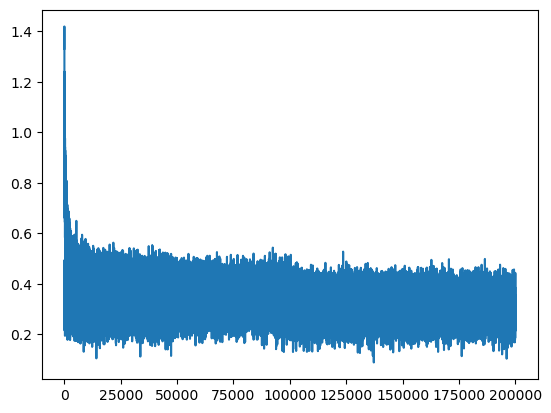

In [218]:
plt.plot(stepi, lossi)
plt.show()
#these noise is due to minibatches

In [219]:
emb = C[Xtr]  #(32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0983, grad_fn=<NllLossBackward0>)

In [220]:
emb = C[Xdev]  #(32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1046, grad_fn=<NllLossBackward0>)

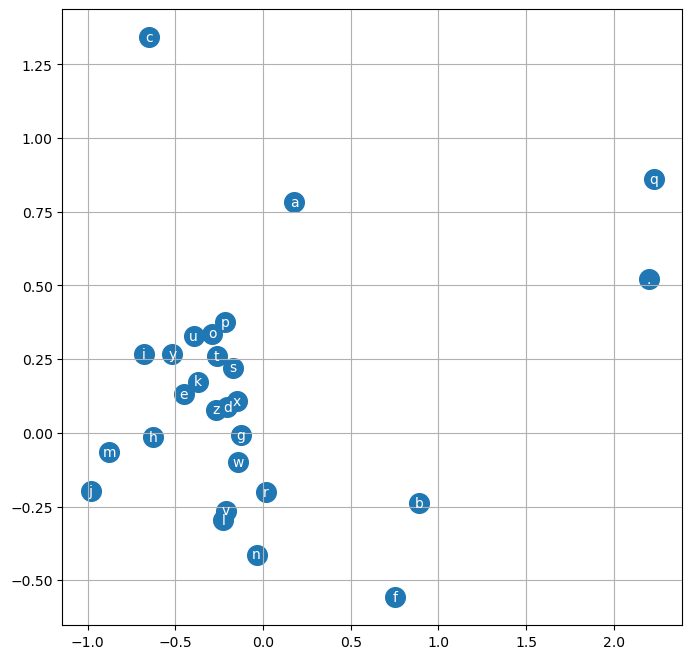

In [216]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center', va='center', color='white')


plt.show(plt.grid('minor'))

In [145]:
emb = C[Xte]  #(32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.2821, grad_fn=<NllLossBackward0>)

In [146]:
# loss are roughly equal it means no overfitting 
# that means that our network is very tinny it underfit

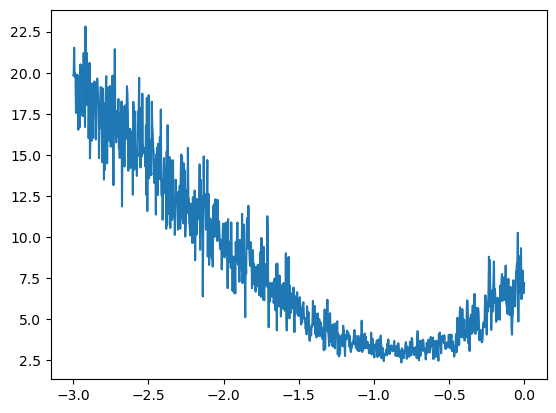

In [111]:
plt.plot(lri,lossi)
plt.show()

In [106]:
torch.randint(0,X.shape[0], (32,))

tensor([122810, 121604,  80800,  34866,  86119,  78470,  75960, 160806, 124304,
        194173, 149682,  77829,  70259, 147110,  56079,  83667, 123162, 171592,
        205603, 152144, 220165, 187465, 219521,  95934, 154759,   5450,  34972,
        191969, 152788, 169998, 124960, 138384])

In [119]:
# training split, dev/evaluation split, test split
# 80,10,10 %

In [196]:
# build the dataset
def build_dataset(words):
    block_size = 3   #content length: how many chracters do we take to predict the next one?
    X, Y = [], []
    for w in words:
    
        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '---->', itos[ix])
    
            #crop and append
            context = context[1:] + [ix]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182441, 3]) torch.Size([182441])
torch.Size([205343, 3]) torch.Size([205343])
torch.Size([22803, 3]) torch.Size([22803])


In [121]:
len(words)

32033

In [123]:
n1

25626

In [124]:
n2

28829

In [125]:
n2-n1

3203

In [126]:
C = torch.randn((27,2))

In [127]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [225]:
#sample from the model

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]  #(1, block_size, dim)
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

carmah.
amori.
kihlemili.
taty.
skanden.
jazheen.
delynn.
jareei.
nellara.
chaiir.
kaleigh.
ham.
pormier.
julinor.
kaivan.
quinaelo.
dearixi.
jace.
pilucile.
deci.
